In [1]:
import cv2
import numpy as np
from Calibration import *
import pylab

In [2]:
uv = np.loadtxt("pts2d-norm-pic_a.txt")
uv1 = np.loadtxt("pts2d-pic_a.txt")
uv2 = np.loadtxt("pts2d-pic_b.txt")
xyz = np.loadtxt("pts3d-norm.txt")

In [3]:
ima = cv2.imread('pic_a.jpg')
imb = cv2.imread('pic_b.jpg')

1: Calibration
==============

1.1 We start by computing the calibration matrix. The residual is computed as the sum of squared differences.

In [4]:
M = compute_projection_matrix(uv, xyz)
print "residual:", compute_residual(uv, xyz, M) 

residual: 0.000168775782172


1.2 here are the results for k = 8, 12, and 16 with 100 repetition. The results shows that having more points to compute the calibration matrix improve the average residual. If we have less points, is easyier to fit perfectly those points, but the obtained generalize poorly on new data. This kind of overfitting is due to the presence of noise, and the discretisation of the scene through the image.

In [5]:
for k in [8, 12, 16]:
    (mini, avg) = k_fold(k, uv, xyz)
    print "when k=", k, " the min residual is: ", mini, " and the avg residual is: ", avg

when k= 8  the min residual is:  1.25135478441e-05  and the avg residual is:  0.000567860453255
when k= 12  the min residual is:  5.99986059408e-06  and the avg residual is:  0.00011993116013


when k= 16  the min residual is:  1.25392966754e-05  and the avg residual is:  9.07494166602e-05


1.3 we can then compute the camera center

In [6]:
print find_center(M)

[[-1.51267725]
 [-2.35168754]
 [ 0.28262819]]


2 Fundamental matrix estimation
=================================

2.1 we now compute F from the 2 set of points

In [7]:
F = compute_fundamental(uv1, uv2)
print F

[[ -6.60698417e-07   7.91031621e-06  -1.88600198e-03]
 [  8.82396296e-06   1.21382933e-06   1.72332901e-02]
 [ -9.07382302e-04  -2.64234650e-02   9.99500092e-01]]


2.2 we can now use the SVD avoid having a full rank solution. By looking at the frobenius distance between the two matrix we can check how close they are.

In [8]:
F2 = clean_fundamental(F)
print F2
print "frobenius distance between F and F2:", np.linalg.norm(F-F2, 'fro')

[[ -6.60698417e-07   7.91031621e-06  -1.88600198e-03]
 [  8.82396296e-06   1.21382933e-06   1.72332901e-02]
 [ -9.07382302e-04  -2.64234650e-02   9.99500092e-01]]
frobenius distance between F and F2: 2.49254555521e-16


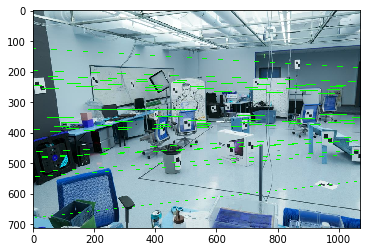

True

In [11]:
res = draw_epipolar_line(imb, F2, uv1)
pylab.imshow(res, cmap=pylab.gray())
pylab.show()
cv2.imwrite(filename="img/pic_b-epipolar.jpg", img=res)

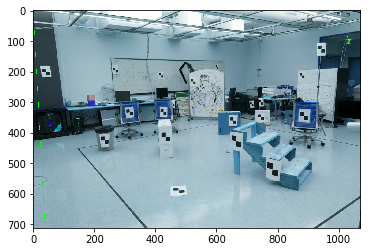

True

In [10]:
res = draw_epipolar_line(ima, np.linalg.pinv(F2), uv1)
pylab.imshow(res, cmap=pylab.gray())
pylab.show()
cv2.imwrite(filename="img/pic_a-epipolar.jpg", img=res)